# <center>  Diagramas de Ojo e Interferencia entre símbolos
  
Todo sistema de comunicación digital puede considerarse formado por un filtro transmisor, un filtro impuesto por la naturaleza del canal y un filtro receptor. La respuesta al impulso de este sistema, que resulta de convolucionar estos tres filtros, tiene que satisfacer el criterio de Nyquist para asegurar que la interferencia entre los símbolos transmitidos (ISI) sea cero. En la práctica esto es difícil de conseguir ya sea porque los filtros diseñados son versiones truncadas en el tiempo de los filtros de Nyquist o porque no se conoce de forma exacta el canal o porque considerar al canal para el diseño de los otros dos filtros introduce una mayor complejidad de desarrollo y un mayor gasto de recursos. Por lo tanto resulta últil, tanto para el diseñador como para el operador, contar con un procedimiento que permita observar cuanto se distancia el sistema de comunicaciones de la condición determinada por Nyquist. El diagrama de ojo es un procedimiento gráfico que permite observar y cuantificar esta degradación. 

El punto de medición para la generación del diagrama es a la salida del filtro receptor. Ésta consiste de trozos de señales solapadas entre sí, de al menos dos períodos de símbolo de duración, producidas por símbolos aleatorios e independientes. Su nombre viene dado por la similitud que tiene este gráfico con el ojo humano. En la Fig.1 se observa un diagrama de ojo típico. 

| ![](images/eyeDiagram.png) | 
|:--:| 
|Fig. 1: Diagrama de ojo. En n = 8 se observa su máxima apertura vertical. La maxíma apertura horizontal va desde un n = 4 a n = 12.|

El instante de tiempo ideal para la obtención de una muestra representativa de los símbolos transmitidos es en el centro del ojo, donde se produce su máxima apertura. Cuando la respuesta al impulso de todo el sistema satisface el criterio de Nyquist todos los cruces producidos en ese intante de tiempo confluyen en un punto.

Por el contrario, cuando la respuesta al impulso no satisface este criterio, el diagrama de ojo tenderá a cerrarse verticalmente como consecuencia de la presencia de ISI y los cruces dejarán de ser puntuales. Cuanto más cerrado es el diagrama de ojo más sensible es el sistema a cometer errores en la detección de los símbolos ante el agregado de una determinada potencia de ruido en el canal. En la Fig. 2.a se observa un diagrama de ojo generado con filtros en el transmisor y en el receptor que han sido truncados en el tiempo en 20 periodos de símbolos ($T_{symb}$) y cuya convolución conforma un filtro de Nyquist. El recorte realizado produce un ISI imperceptible a simple vista para el instante de tiempo  n = 8. Por otro lado, en el diagrama presentado en la Fig. 2.b se ha realizado un truncamiento de los filtros de 4 $T_{symb}$. El ISI observado en n = 8 se debe a que el excesivo recorte de los filtros produjo una pérdida de ortogonalidad entre ellos.  

| ![](images/eyeDiagramDiffTsymbols.png) | 
|:--:| 
|Fig. 2: Diagrama de ojo de una señal conformada por un pulso coseno realzado con un $\beta = 0.25$ y **a)** truncada a 20 periodos de símbolos y **b)** truncada a 4 periodos de símbolos.|


La estimación del instante de muestreo ideal es realizada por una etapa del receptor llamada recuperador de sincronismo (del inglés timing recovery). Como no es posible estimar de forma exacta ese instante de tiempo, resulta importante tener en cuenta también la apertura horizontal del ojo. Cuanto menor sea esta apertura, mayor será la sensibilidad del sistema a cometer errores en la detección de los símbolos ante errores en el instante en que se muestrea la señal (error de fase de sincronismo).

La forma del ojo está determinada por la forma del pulso. El pulso comunmente utilizado es el pulso coseno realzado que cuenta con un parámetro llamado exceso de ancho de banda $\beta$. Cuanto mayor es el valor de este parámetro mayor es la apertura horizontal del ojo, dismimuyendo de esta manera los errores de detección ante un error en la fase de sincronismo, a costa de permitir un mayor ingreso de ruido al sistema, lo cual influye en el desempeño obtenido en el recuperador de sincronismo. 


## Ejercitación
A partir del código proporcionado en esta Notebook y la dirección ip del SDR asignado, resolver las siguientes consignas.


In [1]:
#---------------------------------------------------------------------------------
#Project     : Erasmus + NEON
# Authors    : Martin Ayarde , Felipe Pasquevich
# Affiliation: UNC , CONAE
# E-mail     : martin.ayarde@unc.edu.ar , felipe.pasquevich@conae.gov.ar
#---------------------------------------------------------------------------------

# Run these lines of code if this is your first time using this Jupyter Notebook

#! pip install pyadi-iio
#! pip install scikit-dsp-comm
#! pip install scikit-commpy

In [2]:
#------------------------------- Libraries ------------------------------- 

import adi
import numpy as np
from commpy.filters import rrcosfilter
from sk_dsp_comm import digitalcom as dc
import scipy.signal as signal
import matplotlib.pyplot as plt

1. Partiendo de la configuración por defecto (loopback digital) y para un $\beta$ del filtro coseno realzado igual a 1, 0.75, 0.5 y 0.25: 

   1. ¿Como impacta el valor de $\beta$  en la respuesta al impulso del filtro?

   2. ¿Como impacta el valor de $\beta$ en la respuesta en frecuencia del filtro? y ¿Cuando el sistema es más inmune a un posible ruido gaussiano blanco?

   3. Para los distintos valores de $\beta$ ¿Se observa ISI en el diagrama de ojo para el instante de muestreo ideal? Justifique su respuesta.

   4. Analizando el diagrama de ojo para valores de $\beta$ cada vez mas pequeños ¿el sistema se vuelve más o menos sensible a un error en la fase del sincronismo? Justifique su respuesta.


2. Partiendo de la configuración por defecto (loopback digital) y para un $\beta = 0$ ¿Que es posible deducir del diagrama de ojo? y ¿Que filtro queda conformado para este valor de $\beta$?


3. Para una $\beta = 0.25$ y para cantidades de taps del filtro de $12 T_{symb}$, $8 T_{symb}$, $6 T_{symb}$ y $4 T_{symb}$ ¿Se produce algún tipo de pérdida de desempeño en el sistema? ¿A qué es debido? 


4. Configurando el sistema con un loopback desactivado (la señal sale e ingresa por antena) y un $\beta = 1$ ¿que conclusiones puede obtener al comparar este diagrama de ojo con el observando para el caso de loopback digital? Tenga en cuenta que posiblemente deba realizar varios intentos hasta obtener un diagrama de ojo adecuado. 
  

5. Una forma de reducir la relación señal a ruido (SNR) en la entrada del receptor es dismimuyendo la potencia de la señal de salida del transmisor, esto es haciendo cada vez más negativo el valor de "TxAtten". ¿Que conclusiones puede obtener de la observación del diagrama de ojo a medida que disminuye esta SNR con el sistema configurado con loopback en RF?  


6. Diseñe un código que reemplace el armado del diagrama de ojo realizado por la función "dc.eye_plot".

In [3]:
#------------------ Transmitter configuration parameters ------------------ 

num_bits    = 2**13   # Number of transmitted bits
sps         = 8       # Samples per symbol
span        = 12      # The filter is truncated to span symbols
beta        = 1       # Excess-bandwidth parameter

In [4]:
#------------------------------- SDR Parameter Configuration -------------------------------

Uri              = "ip:192.168.1.17" 
SamplingRate     = 4e6           # Sample rate RX and TX paths[Samples/Sec]
Loopback         = 1             # 0=Disabled, 1=Digital, 2=RF

TxLOFreq         = 910e6         # Carrier frequency of TX path [Hz] RELLENAR CON LA FREC. DE PORTADORA ASIGNADA
TxAtten          = -30           # Attenuation applied to TX path, valid range is -90 to 0 dB [dB]
TxRfBw           = 4e6           # Bandwidth of front-end analog filter of TX path [Hz]

RxLOFreq         = TxLOFreq      # Carrier frequency of RX path [Hz]
GainControlModes = "slow_attack" # Receive path AGC Options: slow_attack, fast_attack, manual
RxHardwareGain   = 0             # Gain applied to RX path. Only applicable when gain_control_mode is set to 'manual'    
RxRfBw           = TxRfBw        # Bandwidth of front-end analog filter of RX path [Hz] 
RxBufferSize     = 2**20-1
                 

In [5]:
#-------------------- Root Raised Cosine Filter Function --------------------

def rrcosdesign(beta,span,sps):
    index     = np.arange(-(span*sps)/2,(span*sps)/2+1,1)
    Ts        = sps
    rrcFilter = np.array([])

    for n in index:
        if beta == 0:
            aux       = np.sinc(n/Ts)/np.sqrt(Ts)
            rrcFilter = np.append(rrcFilter,aux)
        else:
            if n == Ts/(4*beta) or n == -Ts/(4*beta):
                aux       = beta*((np.pi+2)*np.sin(np.pi/(4*beta))+(np.pi-2)*np.cos(np.pi/(4*beta)))/(np.pi*np.sqrt(2*Ts))
                rrcFilter = np.append(rrcFilter,aux)
            else:
                a         = np.cos((1+beta)*np.pi*n/Ts)
                b         = (1-beta)*np.pi*np.sinc((1-beta)*n/Ts)/(4*beta)
                c         = 4*beta/(np.pi*np.sqrt(Ts))
                aux       = c*(a+b)/(1-(4*beta*n/Ts)**2)
                rrcFilter = np.append(rrcFilter,aux)
    return rrcFilter

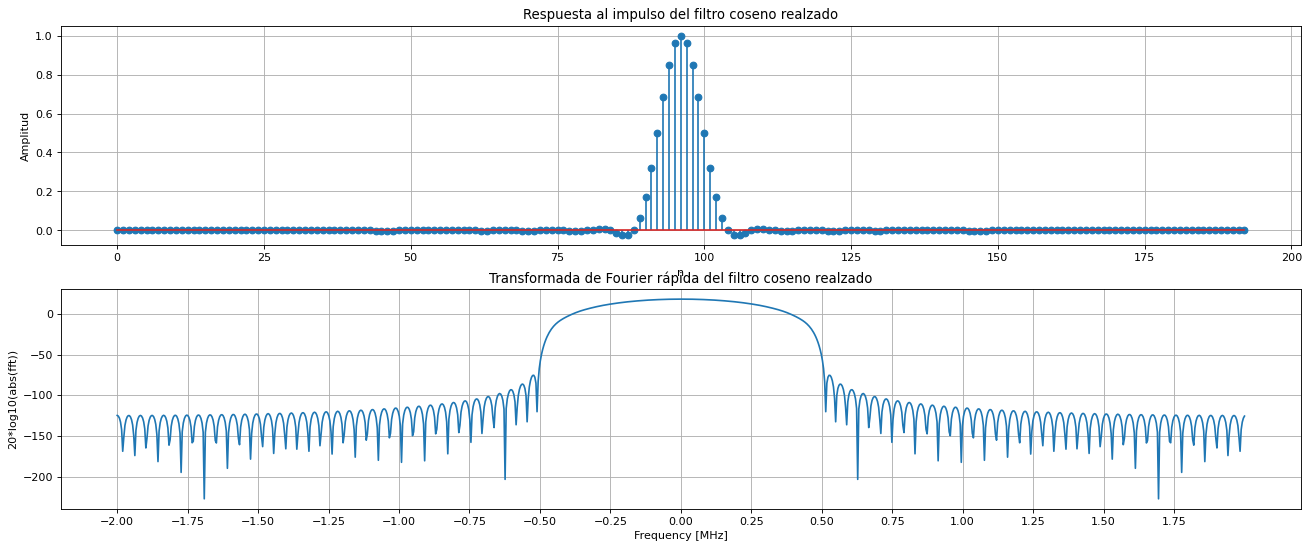

In [6]:
#-------------------- Root Raised Cosine Filter Design --------------------

rrcFilter = rrcosdesign(beta,span,sps)
#rrcFilter = rrcosfilter(span*sps, beta, Ts=1, Fs=sps)[1]

#-------------------- Matched Filter Design --------------------

matchedFilter = np.conj(rrcosdesign(beta,span,sps))
#matchedFilter = np.conj(rrcosfilter(span*sps, beta, Ts=1, Fs=sps))[1]

#-------------------- Raised Cosine Filter --------------------

rcFilter = np.convolve(rrcFilter,matchedFilter)

# Calculate fft
abs_fft    = np.abs(np.fft.fftshift(np.fft.fft(rcFilter,n = 1024)))
abs_fft_dB = 10*np.log10(abs_fft**2)
frec       = np.linspace(SamplingRate/-2, SamplingRate/2, len(abs_fft))

# Plot time domain
plt.figure(figsize=(20,8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.stem(rcFilter)
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.title('Respuesta al impulso del filtro coseno realzado')
plt.grid()
# Plot freq domain
plt.subplot(2,1,2)
plt.plot(frec/1e6, abs_fft_dB)
plt.xticks(np.arange(min(frec/1e6), max(frec/1e6), 0.25))
plt.xlabel("Frequency [MHz]")
plt.ylabel("20*log10(abs(fft))")
plt.title('Transformada de Fourier rápida del filtro coseno realzado')
plt.grid()
plt.show()

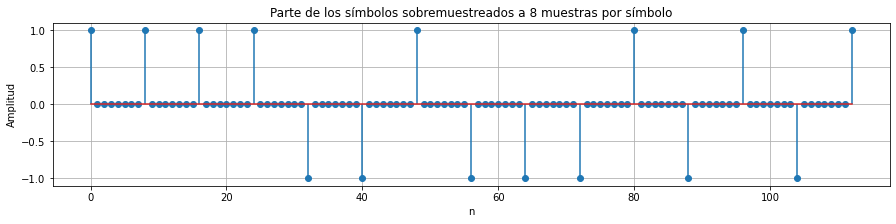

In [7]:
#------------------------------- Symbol Generator ------------------------------- 

bits       = np.random.randint(0, 2, num_bits)
symbolsUps = np.array([])

for bit in bits:
    pulse      = np.zeros(sps)
    pulse[0]   = bit*2-1 
    symbolsUps = np.concatenate((symbolsUps, pulse)) 
    
plt.figure(figsize=(15,3))
plt.stem(symbolsUps[0:113])
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title("Parte de los símbolos sobremuestreados a %i muestras por símbolo" %sps)
plt.grid()
plt.show()

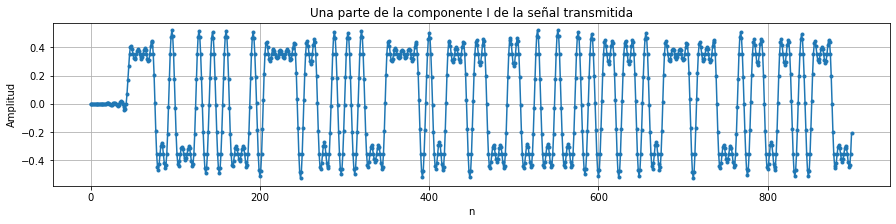

In [8]:
#------------------------------- Transmitted I component ------------------------------- 
txSignal = np.convolve(symbolsUps, rrcFilter)
plt.figure(figsize=(15,3))
plt.plot(txSignal[0:900], '.-')
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.title('Una parte de la componente I de la señal transmitida')

plt.grid()
plt.show()

In [9]:
#------------------------------- SDR Setup ------------------------------- 

sdr             = adi.Pluto(Uri)
sdr.sample_rate = SamplingRate
sdr.loopback    = Loopback
#Tx:
sdr.tx_lo                 = int(TxLOFreq)
sdr.tx_hardwaregain_chan0 = TxAtten 
sdr.tx_rf_bandwidth       = int(TxRfBw)
sdr.tx_cyclic_buffer      = True
# Rx:
sdr.rx_lo                   = int(RxLOFreq)
sdr.gain_control_mode_chan0 = GainControlModes
sdr.rx_rf_bandwidth         = int(RxRfBw)
sdr.rx_cyclic_buffer        = False
sdr.rx_buffer_size          = RxBufferSize


In [10]:
#------------------------------- Transmitter ------------------------------- 

sdr.tx(txSignal*2**14)

In [11]:
#------------------------------- Receiver ------------------------------- 

rxSignal = sdr.rx()/2**14

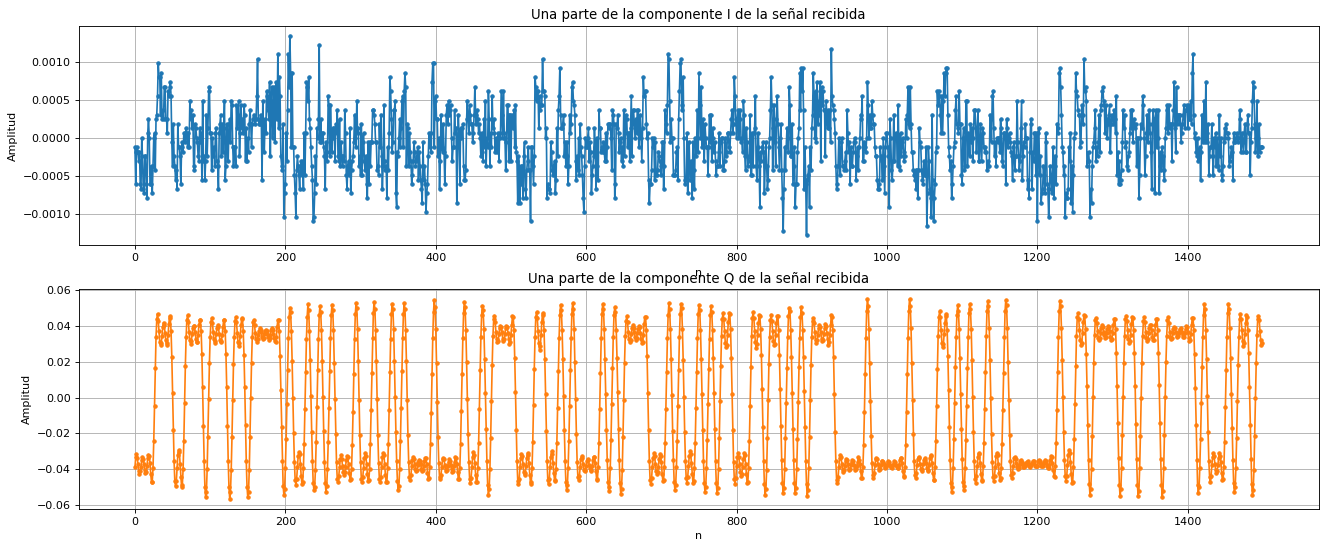

In [12]:
#------------------------------- Received I component ------------------------------- 
# Plot time domain
plt.figure(figsize=(20,8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.plot(np.real(rxSignal[0:1500]), '.-')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title('Una parte de la componente I de la señal recibida')
plt.grid()

#------------------------------- Received Q component -------------------------------
# Plot time domain
plt.subplot(2,1,2)
plt.plot(np.imag(rxSignal[0:1500]), '.-C1')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title('Una parte de la componente Q de la señal recibida')
plt.grid()
plt.show()

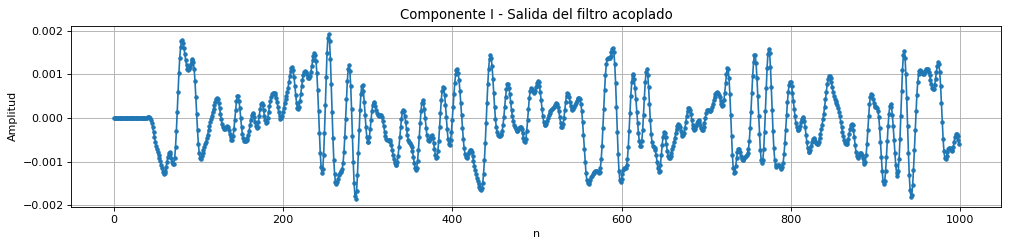

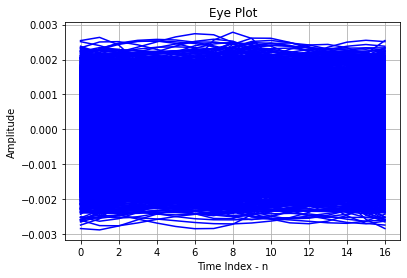

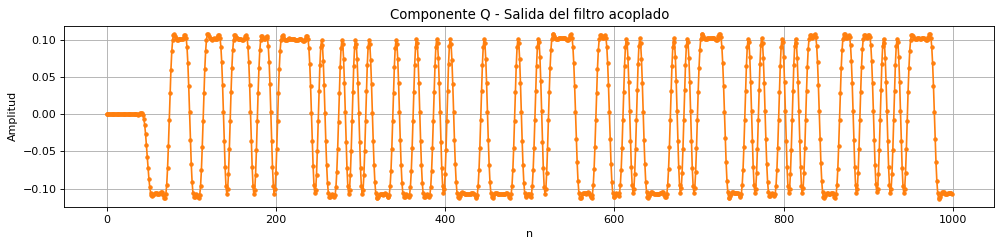

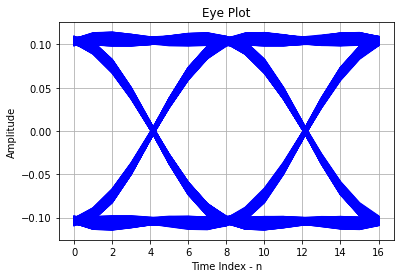

In [13]:
#------------------------------- Filtered I component -------------------------------

iRxFilSignal = np.convolve(np.real(rxSignal),matchedFilter)
plt.figure(figsize=(15, 3), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(iRxFilSignal[0:1000],'.-')
plt.title('Componente I - Salida del filtro acoplado')
plt.ylabel('Amplitud')
plt.xlabel('n')
plt.grid()
plt.show()

corr     = signal.correlate(np.real(txSignal), np.real(rxSignal), mode="full")
lags     = signal.correlation_lags(len(txSignal), len(rxSignal), mode="full")
Rmax_pos = np.argmax(corr)

#------------------------------- Eye Diagram -------------------------------

i_Signal = iRxFilSignal[-lags[Rmax_pos]+2*span*sps:-lags[Rmax_pos]+len(txSignal)-2*span*sps] 
L        = sps*2           # display length in samples (usually two symbols)
S        = 0               # start index
dc.eye_plot(i_Signal,L,S)
plt.show()

#------------------------------- Filtered Q component -------------------------------

qRxFilSignal = np.convolve(np.imag(rxSignal),matchedFilter)
plt.figure(figsize=(15, 3), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(qRxFilSignal[0:1000],'.-C1')
plt.title('Componente Q - Salida del filtro acoplado')
plt.ylabel('Amplitud')
plt.xlabel('n')
plt.grid()
plt.show()

#------------------------------- Eye Diagram -------------------------------

q_Signal = qRxFilSignal[-lags[Rmax_pos]+2*span*sps:-lags[Rmax_pos]+len(txSignal)-2*span*sps] 
dc.eye_plot(q_Signal,L,S)
plt.show()

In [14]:
# Since it is not possible to turn off Tx, it is configured to transmit at low power and on a different frequency than Rx.
sdr.tx_destroy_buffer()
TxAtten  = -70
RxLOFreq = 2400e6
sdr.tx(np.zeros(1024))

In [15]:
# Destroy radio object
del(sdr)

[![CC BY 4.0][cc-by-shield]][cc-by]

This work is licensed under a
[Creative Commons Attribution 4.0 International License][cc-by].

[![CC BY 4.0][cc-by-image]][cc-by]

[cc-by]: http://creativecommons.org/licenses/by/4.0/
[cc-by-image]: https://i.creativecommons.org/l/by/4.0/88x31.png
[cc-by-shield]: https://img.shields.io/badge/License-CC%20BY%204.0-lightgrey.svg

![logo_neon_erasmus](https://raw.githubusercontent.com/neon-iot/communication_labs/main/detection_theory/notebooks/images/BannerSupportErasmus_.png)
